붓꽃 품종 분류하기

In [1]:
from sklearn.datasets import load_iris

iris = load_iris()
# print(iris.DESCR)

iris_data = iris.data
print('irist data: ', iris_data[:10])

iris_label = iris.target
print('iris label: ', iris_label[:10])

iris_fn = iris.target_names
print('iris target name: ', iris_fn)

irist data:  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
iris label:  [0 0 0 0 0 0 0 0 0 0]
iris target name:  ['setosa' 'versicolor' 'virginica']


In [2]:
import pandas as pd

iris_df = pd.DataFrame(data=iris_data, columns=list(iris.feature_names))
iris_df['label'] = iris.target
iris_df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


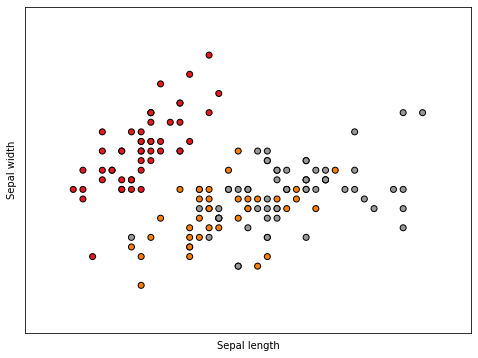

In [3]:
import matplotlib.pyplot as plt

X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)
print(y_train)
print(y_test)

[0 2 2 0 0 2 2 1 0 1 1 2 0 1 2 1 1 0 2 0 2 2 1 2 1 0 0 1 0 0 2 2 2 0 0 0 1
 0 1 2 2 1 1 2 2 0 1 1 2 2 2 0 2 0 0 0 0 2 0 0 0 1 0 1 1 2 1 0 0 0 1 1 1 2
 1 0 1 2 0 2 2 1 0 0 0 2 1 0 2 1 2 0 0 1 1 2 1 2 2 1 1 2 2 0 1 2 0 2 2 0 1
 2 0 1 1 1 0 1 1 1]
[2 2 2 1 2 0 1 0 0 1 2 1 1 2 2 0 2 1 2 2 1 0 0 1 0 0 2 1 0 1]


In [5]:
from sklearn.tree import DecisionTreeClassifier

df_clf = DecisionTreeClassifier(random_state=11)
df_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [6]:
from sklearn.metrics import accuracy_score

pred = df_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


In [10]:
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(df_clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)

#display(graphviz.Source(dot_data))

'digraph Tree {\nnode [shape=box, style="filled", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label="petal width (cm) <= 0.8\\ngini = 0.667\\nsamples = 120\\nvalue = [41, 40, 39]\\nclass = setosa", fillcolor="#fffdfd"] ;\n1 [label="gini = 0.0\\nsamples = 41\\nvalue = [41, 0, 0]\\nclass = setosa", fillcolor="#e58139"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="petal width (cm) <= 1.55\\ngini = 0.5\\nsamples = 79\\nvalue = [0, 40, 39]\\nclass = versicolor", fillcolor="#fafefc"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="petal length (cm) <= 5.25\\ngini = 0.051\\nsamples = 38\\nvalue = [0, 37, 1]\\nclass = versicolor", fillcolor="#3ee684"] ;\n2 -> 3 ;\n4 [label="gini = 0.0\\nsamples = 37\\nvalue = [0, 37, 0]\\nclass = versicolor", fillcolor="#39e581"] ;\n3 -> 4 ;\n5 [label="gini = 0.0\\nsamples = 1\\nvalue = [0, 0, 1]\\nclass = virginica", fillcolor="#8139e5"] ;\n3 -> 5 ;\n6 [label="petal wid